# Compare Tissues

In [67]:
results_paths = c(
    adrenal = "../01-Adrenal/output/adrenal__infected_vs_uninfected.de.csv",
    Spleen = "../02-Spleen/output/spleen.de.csv",
    lymph_node_ax_r = "../03-LymphNode_AX_R/output/LN_AX_R.de.csv",
    lymph_node_ing_l = "../04-LymphNode_ING_L/output/LN_ING_L.de.csv",
    lymph_node_mes = "../05-LymphNode_MES/output/LN_MES.de.csv",
    Kidney = "../06-Kidney/output/Kidney.de.csv",
    Liver = "../07-Liver/output/Liver.de.csv",
    brain_gray = "../08-Brain_Brain-Gr/output/BrainGray.de.csv",
    sex_organ_ovary = "../10-SexOrgan_Ovary/output/SexOrgan_Ovary.de.csv",
    sex_organ_sex_organ = "../12-SexOrgan_SexOrgan/output/SexOrgan_SexOrgan.de.csv",
    skin_rash = "../13-Skin_Rash/output/Skin_Rash.de.csv",
    lung = "../14-Lung/output/Lung.de.csv",
    skin_non_rash = "../15-Skin_NonRash/output/Skin_NonRash.de.csv",
    brain_white = "../16-Brain_Brain-Wh/output/Brain_White.de.csv"
   
)


In [68]:
results.all.tissues <- lapply(results_paths, read.csv)

In [69]:
source('../../prj_helpers.R')

In [70]:
de.genes.all.tissues <- lapply(results.all.tissues, function(x) {
    xp <- x[NA2FALSE(x$padj < 0.05),]
    unique(xp$Geneid)
})

In [71]:
x=results.all.tissues$spleen
x[NA2FALSE(x$padj < 0.1),]

NULL

In [72]:
n.de.per.tissue <- unlist(lapply(de.genes.all.tissues, length))
n.de.df.plot <- data.frame(
    tissue = names(n.de.per.tissue),
    n.genes = n.de.per.tissue
)

In [73]:
library(ggplot2)
library(forcats)
library(tidyverse)

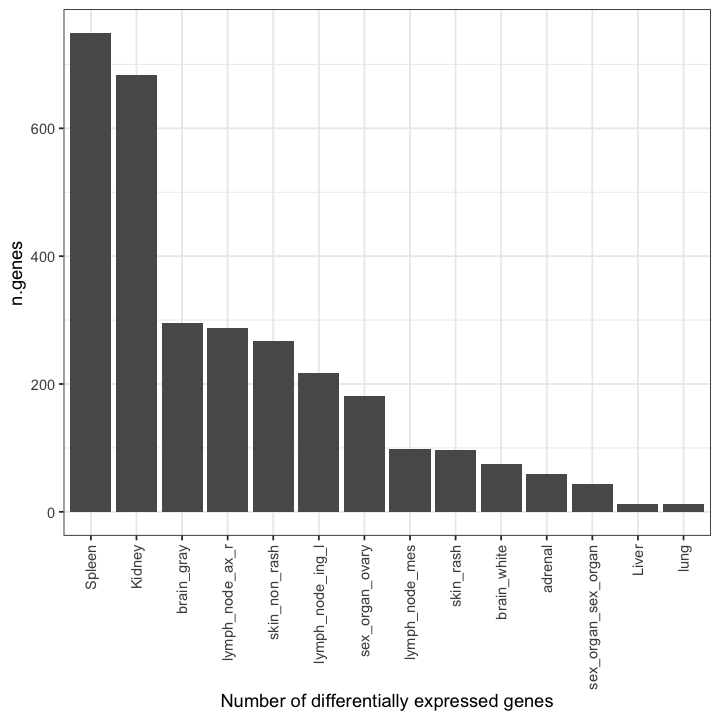

In [74]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(n.de.df.plot, aes(x=fct_reorder(tissue, desc(n.genes)),y=n.genes)) +
    geom_bar(stat='identity') + 
    theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
    scale_x_discrete("Number of differentially expressed genes")

In [75]:
ggsave('output/n_de_genes.png',w=10,h=10)

In [76]:
tissues.expressed.cutoff <- 4
recurrent.genes <- names(which(sort(table(unlist(de.genes.all.tissues)),decreasing = T) > tissues.expressed.cutoff))

In [77]:
recurrent.genes <- recurrent.genes[recurrent.genes != '']

In [78]:
tmp1 <- lapply(results.all.tissues, function(x) {
    rownames(x) <- x$Geneid
    x[recurrent.genes,]$log2FoldChange
})
tmp2 <- do.call(cbind, tmp1)
rownames(tmp2) <- recurrent.genes

In [79]:
tmp2

,adrenal,Spleen,lymph_node_ax_r,lymph_node_ing_l,lymph_node_mes,Kidney,Liver,brain_gray,sex_organ_ovary,sex_organ_sex_organ,skin_rash,lung,skin_non_rash,brain_white
ENSMMUG00000015968.4,6.059434,5.373747,5.526026,5.085789,5.693959,6.236175,-0.16086839,3.063959,6.554770,4.887122,5.576071,2.3469866,5.456039,3.661796
ENSMMUG00000050757.1,8.561166,5.969344,7.420183,6.385332,6.484706,8.771312,0.61503807,3.542686,6.857081,5.371449,8.715154,2.7163003,7.855843,4.870419
ENSMMUG00000001569.4,5.897794,5.287753,4.491577,4.150837,4.724338,5.930220,0.29462911,4.199522,5.130723,4.456850,7.057446,1.8066025,5.063824,5.010206
ENSMMUG00000003272.4,7.443789,3.824942,3.219152,3.016059,3.037219,7.333518,1.44586954,5.421242,6.768383,4.676375,7.448054,1.1118229,6.374048,6.298599
ENSMMUG00000005001.4,6.050318,5.130511,4.425368,4.185230,4.224937,5.175430,1.11557205,4.196919,5.061698,3.709378,5.542363,1.6602026,5.041281,5.346280
ENSMMUG00000008505.4,6.868374,3.929496,3.495064,3.359310,3.476130,5.965797,1.31770571,4.393440,6.101625,3.768520,6.897403,1.7010852,5.321373,6.283946
ENSMMUG00000009602.4,6.453151,3.061499,3.368661,3.157185,2.914647,4.895253,0.30990391,3.726572,4.854836,2.831905,4.409996,0.7677316,4.734768,4.838802
ENSMMUG00000010314.4,5.608564,3.196991,3.109804,3.094838,3.215065,5.918125,-0.14966315,3.470615,5.081343,2.472200,5.363304,0.7113770,5.886217,3.970759
ENSMMUG00000011454.4,5.716981,4.718837,6.303069,5.457451,5.339351,7.469292,0.53552109,4.256721,6.520145,4.715786,6.163303,2.7620357,6.766655,4.757205
ENSMMUG00000012782.4,6.954782,4.365263,4.643842,3.819231,4.512456,6.075235,1.21638210,3.709353,5.551323,3.572889,4.759059,1.8143594,4.632746,5.439481


In [62]:
# Create a gene map
gene_map <- results.all.tissues[[1]][,c('Geneid','external_gene_name')]
head(gene_map)

,Geneid,external_gene_name
,<chr>,<chr>
1,ENSMMUG00000015329.4,MX1
2,ENSMMUG00000044257.2,MX2
3,ENSMMUG00000012782.4,OAS1
4,ENSMMUG00000050757.1,ISG15
5,ENSMMUG00000008505.4,OAS2
6,ENSMMUG00000009602.4,XAF1


In [16]:
# Convert ens ids to gene names, if they can be converted. Keep as is otherwise
new.names <- sapply(rownames(tmp2), function(x) { 
    new.name <- gene_map[match(x, gene_map$Geneid),'external_gene_name']
    ifelse(new.name != '', new.name, x)
})
rownames(tmp2) <- new.names

### Heatmap of recurrent genes

In [17]:
library(pheatmap)
library(viridis)

Loading required package: viridisLite



In [18]:
pheatmap(tmp2,show_rownames = TRUE, color=inferno(10), fontsize_row=6, filename='output/recurrent_genes.png')

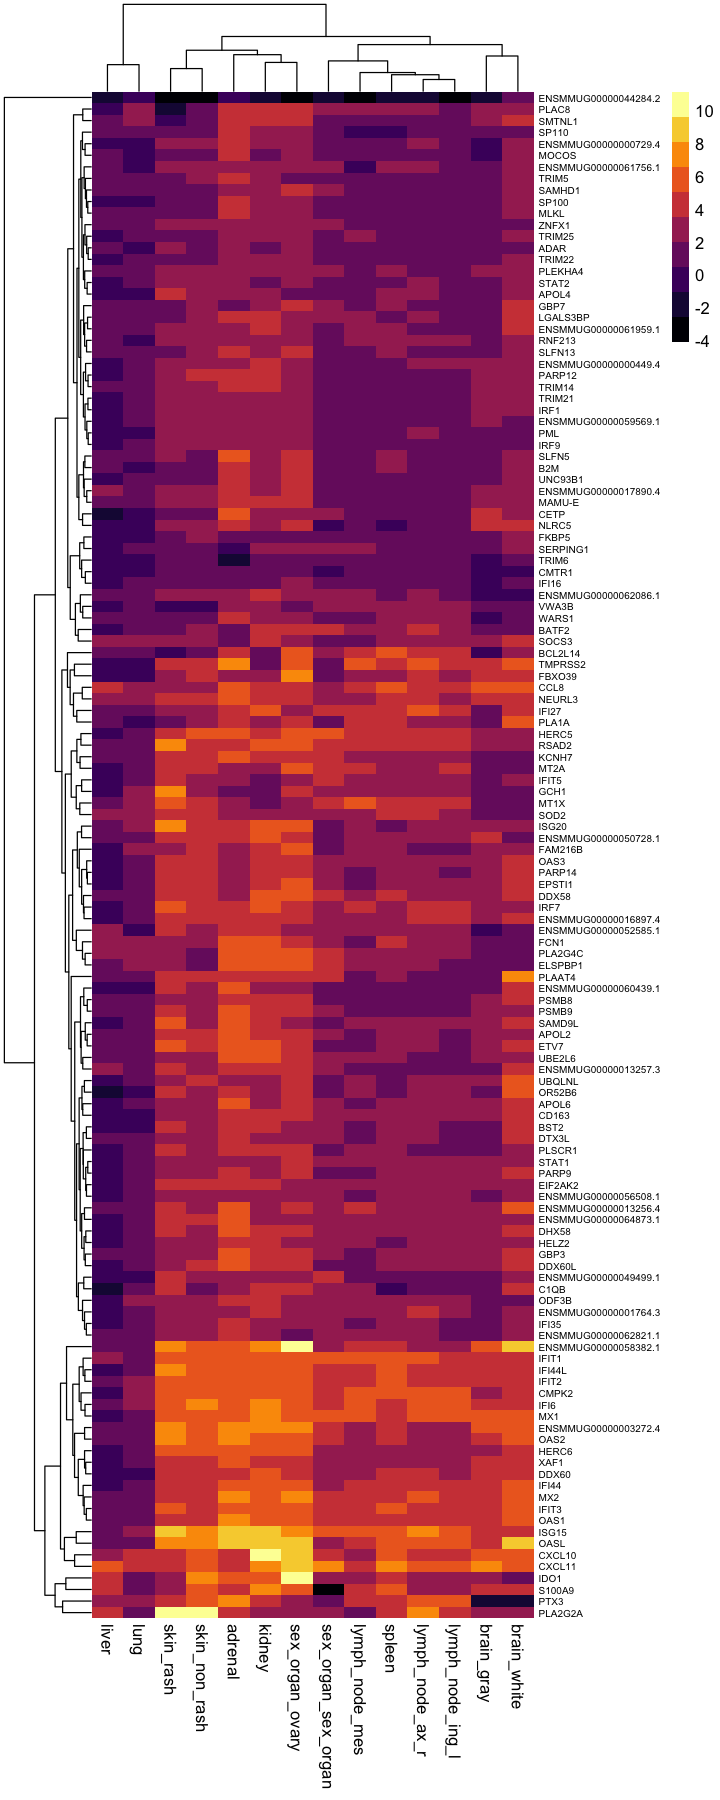

In [19]:
options(repr.plot.width=6, repr.plot.height=15)
pheatmap(tmp2,show_rownames = TRUE, color=inferno(10), fontsize_row=6)

# PCA of fold changes

In [20]:
str(results.all.tissues,1)

List of 14
 $ adrenal            :'data.frame':	35395 obs. of  19 variables:
 $ spleen             :'data.frame':	35395 obs. of  19 variables:
 $ lymph_node_ax_r    :'data.frame':	35395 obs. of  19 variables:
 $ lymph_node_ing_l   :'data.frame':	35395 obs. of  19 variables:
 $ lymph_node_mes     :'data.frame':	35395 obs. of  19 variables:
 $ kidney             :'data.frame':	35395 obs. of  19 variables:
 $ liver              :'data.frame':	35395 obs. of  19 variables:
 $ brain_gray         :'data.frame':	35395 obs. of  19 variables:
 $ sex_organ_ovary    :'data.frame':	35395 obs. of  19 variables:
 $ sex_organ_sex_organ:'data.frame':	35395 obs. of  19 variables:
 $ skin_rash          :'data.frame':	35395 obs. of  19 variables:
 $ lung               :'data.frame':	35395 obs. of  19 variables:
 $ skin_non_rash      :'data.frame':	35395 obs. of  19 variables:
 $ brain_white        :'data.frame':	35395 obs. of  19 variables:


In [21]:
head(results.all.tissues$adrenal,n=5)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Geneid,Chr,Start,End,Strand,Length,viralGene,Geneid_noversion,ensembl_gene_id,external_gene_name,external_gene_source,description
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ENSMMUG00000015329.4,2197.8352,5.880394,1.025107,5.736371,9.672654e-09,2.895670e-05,ENSMMUG00000015329.4,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,5184764;5189232;5189233;5197800;5197800;5197800;5199345;5199345;5199345;5201296;5201296;5201296;5204410;5204410;5204410;5204980;5204980;5204980;5206660;5206660;5206660;5208585;5208585;5208585;5209388;5209388;5209388;5210514;5210514;5210514;5213229;5213229;5213229;5214394;5214394;5214394;5218233;5218233;5218233;5219807;5219807;5219807;5223072;5223072;5223072;5223988;5224122;5224229,5189921;5189921;5189921;5198045;5198045;5198045;5199421;5199421;5199421;5201454;5201454;5201454;5204551;5204551;5204551;5205102;5205102;5205102;5206738;5206738;5206738;5208783;5208783;5208783;5209526;5209526;5209526;5210668;5210668;5210668;5213366;5213366;5213366;5214586;5214586;5214586;5218354;5218354;5218344;5219882;5219882;5219881;5223180;5223180;5223180;5224036;5224141;5224295,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,7251,FALSE,ENSMMUG00000015329,ENSMMUG00000015329,MX1,VGNC Symbol,MX dynamin like GTPase 1 [Source:VGNC Symbol;Acc:VGNC:75086]
2,ENSMMUG00000044257.2,425.7428,7.036044,1.194154,5.892076,3.813731e-09,2.895670e-05,ENSMMUG00000044257.2,chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3;chr3,5231302;5231576;5231577;5231577;5232000;5233249;5233249;5233249;5233249;5233249;5235185;5236823;5236823;5236823;5236823;5236823;5236823;5238037;5238037;5238037;5238037;5238037;5238037;5241060;5241060;5241060;5241060;5241060;5241060;5241353;5241353;5241353;5241353;5241353;5241353;5243969;5243969;5243969;5243969;5243969;5243969;5245827;5245827;5245827;5245827;5245827;5245827;5250866;5250866;5250866;5250866;5250866;5250866;5257257;5257257;5257257;5257257;5257257;5257257;5258397;5258397;5258397;5258397;5258397;5260412;5260416;5260416;5260416;5260416;5260416;5261243;5261243;5261243;5261243;5261243;5261243;5265398;5268930;5270079;5275321;5275321;5275321,5232242;5232242;5232242;5232242;5232242;5233503;5233503;5233503;5233503;5233503;5236174;5236899;5236899;5236899;5236899;5236899;5236899;5238195;5238195;5238195;5238195;5238195;5238195;5241201;5241201;5241201;5241201;5241201;5241201;5241475;5241475;5241475;5241475;5241475;5241475;5244047;5244047;5244047;5244047;5244047;5244047;5246025;5246025;5246025;5246025;5246025;5246025;5251004;5251004;5251004;5251004;5251004;5251004;5257411;5257494;5257411;5257411;5257411;5257411;5258531;5258531;5258531;5258531;5258531;5260608;5260608;5260608;5260608;5260608;5260608;5261562;5261491;5261562;5261562;5261562;5261562;5265462;5269021;5270223;5275342;5275349;5275349,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,4325,FALSE,ENSMMUG00000044257,ENSMMUG00000044257,MX2,VGNC Symbol,MX dynamin like GTPase 2 [Source:VGNC Symbol;Acc:VGNC:81723]
3,ENSMMUG00000012782.4,121.2865,6.954782,1.206466,5.764592,8.185584e-09,2.895670e-05,ENSMMUG00000012782.4,chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11;chr11,112631714;112631714;112632587;

In [22]:
z <- lapply(results.all.tissues, function(x) {x$X})

In [23]:
all(z[[1]] == z[[2]])

[1] FALSE

In [24]:
head(z[[1]])

[1] "ENSMMUG00000015329.4" "ENSMMUG00000044257.2" "ENSMMUG00000012782.4"
[4] "ENSMMUG00000050757.1" "ENSMMUG00000008505.4" "ENSMMUG00000009602.4"

In [25]:
results.all.tissues.o_gene <- lapply(results.all.tissues, function(x) {x[order(x$X),]})

In [26]:
all(results.all.tissues.o_gene[[1]]$X == results.all.tissues.o_gene[[2]]$X)

[1] TRUE

In [27]:
flc.mat <- do.call(cbind,lapply(results.all.tissues.o_gene, function(x) {x$log2FoldChange}))
rownames(flc.mat) <- results.all.tissues.o_gene[[1]]$X

In [28]:
flc.mat[is.na(flc.mat)] <- 0

In [29]:
pca.lfc <- prcomp(t(flc.mat))

In [30]:
str(pca.lfc)

List of 5
 $ sdev    : num [1:14] 66.4 59.8 56 51.5 50.8 ...
 $ rotation: num [1:35395, 1:14] 0.00341 0.00334 -0.00117 -0.00239 0.00224 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:35395] "ENSMMUG00000000001.4" "ENSMMUG00000000002.4" "ENSMMUG00000000005.4" "ENSMMUG00000000006.4" ...
  .. ..$ : chr [1:14] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:35395] -0.0823 -0.0135 0.3107 3.8726 -0.1613 ...
  ..- attr(*, "names")= chr [1:35395] "ENSMMUG00000000001.4" "ENSMMUG00000000002.4" "ENSMMUG00000000005.4" "ENSMMUG00000000006.4" ...
 $ scale   : logi FALSE
 $ x       : num [1:14, 1:14] -64.2 -23.3 39.3 27.8 124.3 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:14] "adrenal" "spleen" "lymph_node_ax_r" "lymph_node_ing_l" ...
  .. ..$ : chr [1:14] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


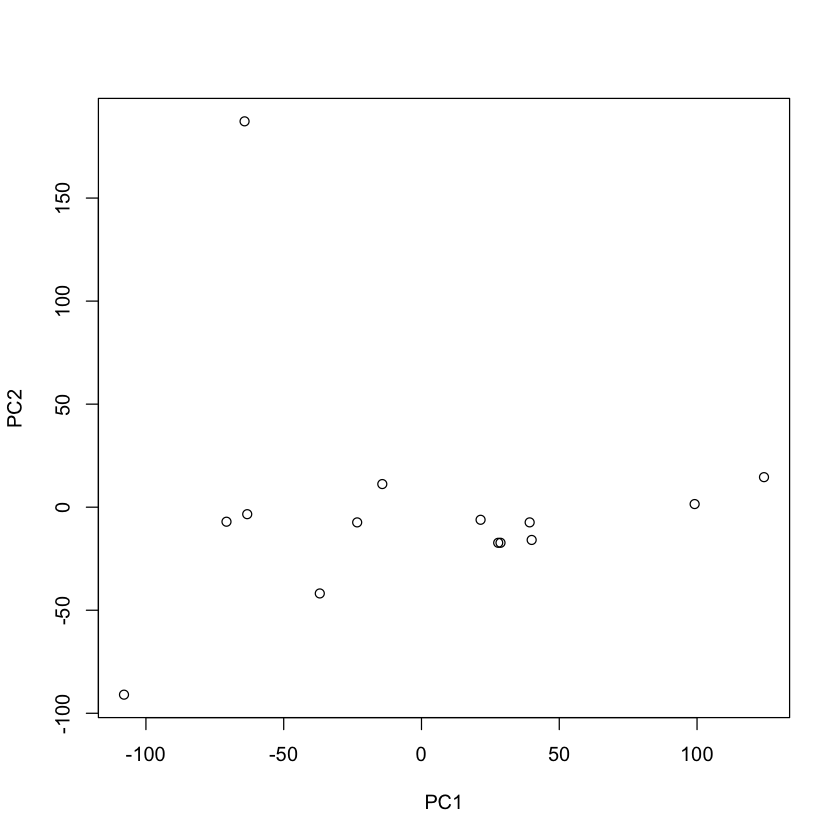

In [31]:
options(repr.plot.width=7, repr.plot.height=7)
plot(pca.lfc$x[,1:2])

In [32]:
plot.df <- data.frame(tissue=rownames(pca.lfc$x),pca.lfc$x[,1:3])

In [33]:
head(plot.df)

,tissue,PC1,PC2,PC3
,<chr>,<dbl>,<dbl>,<dbl>
adrenal,adrenal,-64.20340,187.235678,-48.172637
spleen,spleen,-23.33867,-7.373951,13.875562
lymph_node_ax_r,lymph_node_ax_r,39.25561,-7.367259,-6.701500
lymph_node_ing_l,lymph_node_ing_l,27.84028,-17.275057,5.421237
lymph_node_mes,lymph_node_mes,124.29909,14.574857,-48.112657
kidney,kidney,-70.76439,-7.044449,27.466063


In [34]:
library(ggrepel)

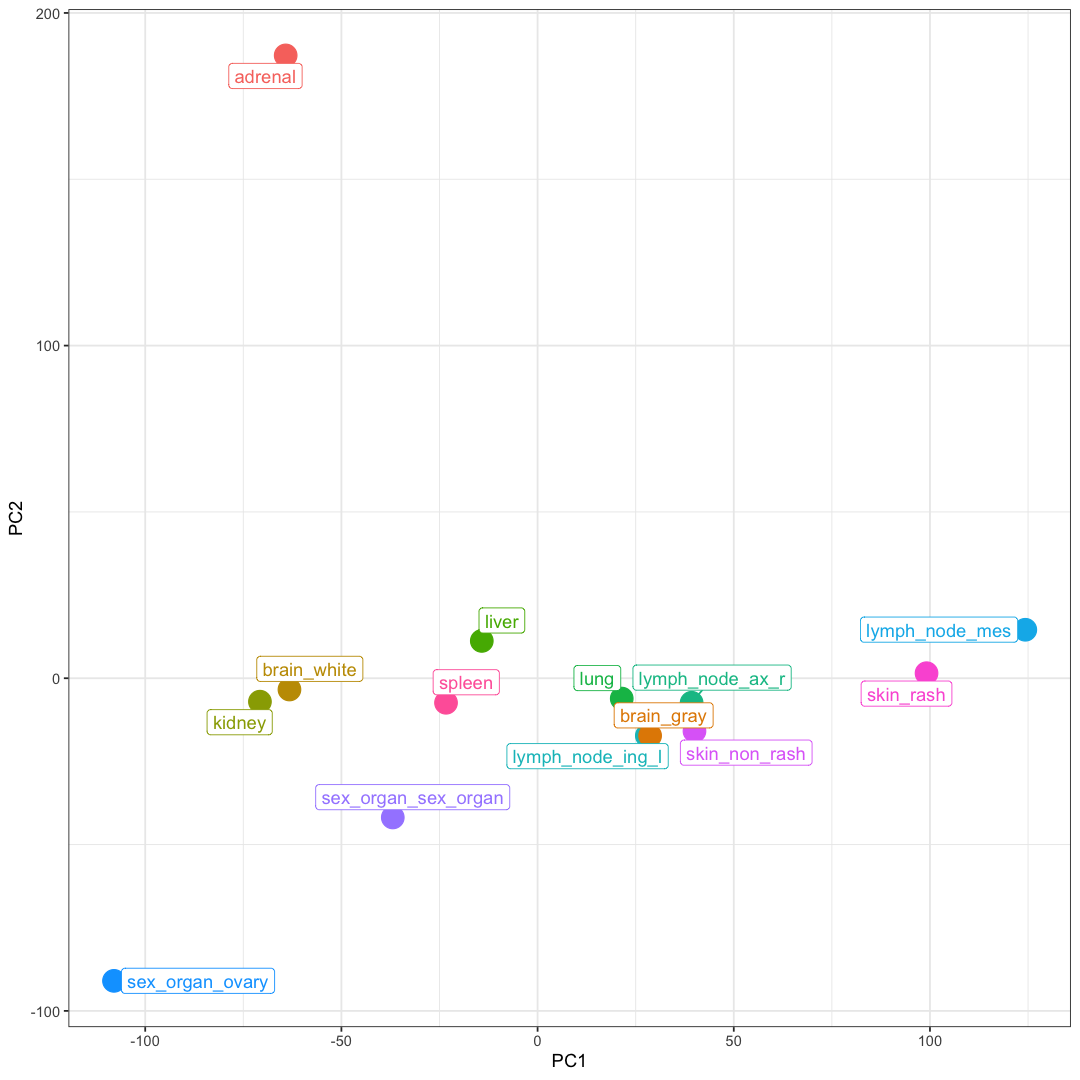

In [35]:
options(repr.plot.width=9, repr.plot.height=9)
ggplot(plot.df, aes(color=tissue, x=PC1, y=PC2)) +
    geom_point(size=6) + 
    theme_bw() + theme(legend.position='none') + 
    geom_label_repel(aes(label=tissue))
    

In [36]:
# pick genes de in at least one tissue
de.genes <- unique(unlist(lapply(results.all.tissues, function(x) {x$X[x$padj < 0.05]})))

In [37]:
flc.mat[1:3,1:3]

,adrenal,spleen,lymph_node_ax_r
ENSMMUG00000000001.4,0.4975436,-0.1794700,0.5442809
ENSMMUG00000000002.4,0.4348440,-0.2279602,1.2656310
ENSMMUG00000000005.4,1.5331613,-0.1966687,0.7392688


In [38]:
head(de.genes)

[1] "ENSMMUG00000015329.4" "ENSMMUG00000044257.2" "ENSMMUG00000012782.4"
[4] "ENSMMUG00000050757.1" "ENSMMUG00000008505.4" "ENSMMUG00000009602.4"

In [39]:
table(de.genes %in% rownames(flc.mat))


FALSE  TRUE 
    1  1695 

In [40]:
de.genes <- de.genes[!is.na(de.genes)]

In [41]:
pca.lfc.sel <- prcomp(t(scale(flc.mat[de.genes,])))

In [42]:
plot.df <- data.frame(tissue=rownames(pca.lfc.sel$x),pca.lfc.sel$x[,1:3])

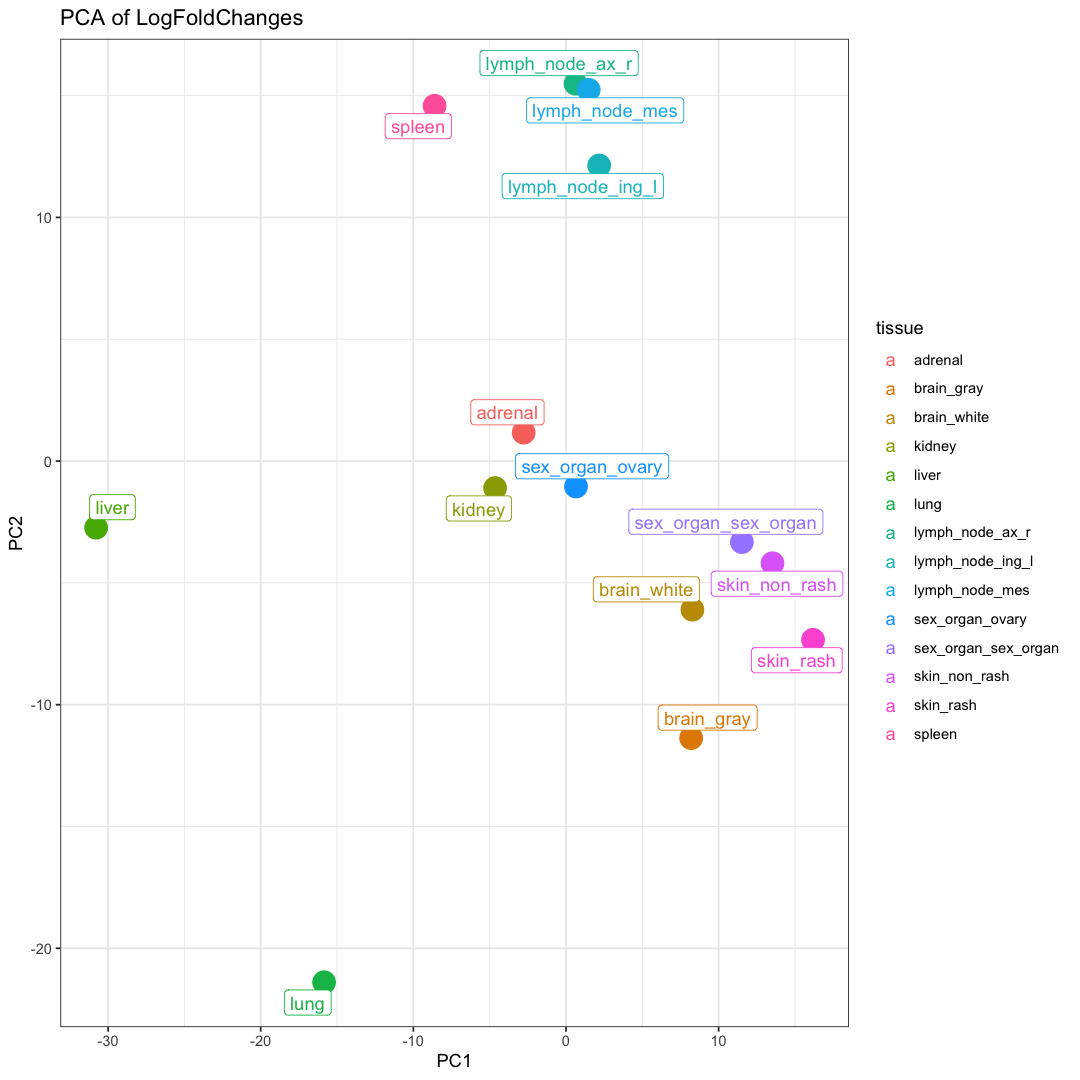

In [43]:
ggplot(plot.df, aes(color=tissue, x=PC1, y=PC2)) + 
    geom_point(size=6) + 
    theme_bw() + 
    geom_label_repel(aes(label=tissue)) + 
    ggtitle('PCA of LogFoldChanges')

In [44]:
ggsave('output/pca_lfc.png',w=8,h=8)

In [45]:
# Show the genes weighted in these PCs

In [46]:
n.top.genes.per.pc <- 20

loaded.genes <- unique(c(
    head(names(sort(abs(pca.lfc.sel$rotation[,c('PC1')]),decreasing = T)),n=n.top.genes.per.pc),
    head(names(sort(abs(pca.lfc.sel$rotation[,c('PC2')]),decreasing = T)),n=n.top.genes.per.pc)
    ))

In [47]:
loading_scale <- 1e2
loaded.genes.df <- as.data.frame(pca.lfc.sel$rotation[loaded.genes,c('PC1','PC2')])

In [48]:
loaded.genes.df$symbol <- gene_map$external_gene_name[match(rownames(loaded.genes.df), gene_map$Geneid)]

Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


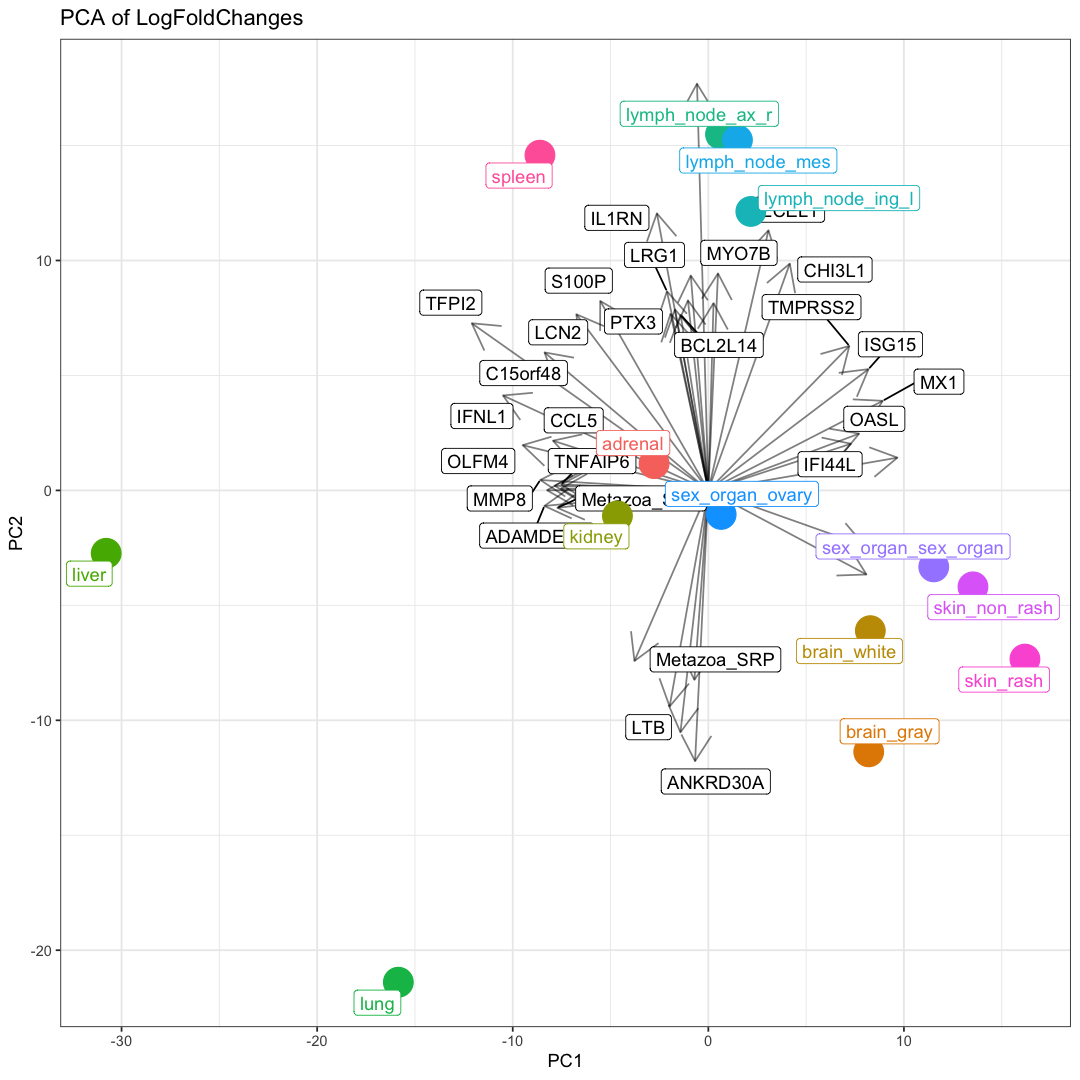

In [49]:
ggplot(plot.df, aes(color=tissue, x=PC1, y=PC2)) + 
    theme_bw() + 
    geom_segment(
        alpha=0.5,
        arrow = arrow(),
        data=loaded.genes.df,
        aes(x=0,y=0,xend=PC1*loading_scale,yend=PC2*loading_scale),inherit.aes=F
    ) +   ggtitle('PCA of LogFoldChanges') +
    geom_label_repel(data=loaded.genes.df,aes(x=PC1*loading_scale,y=PC2*loading_scale,label=symbol),inherit.aes=F) +
    geom_point(size=8) +
    geom_label_repel(aes(label=tissue)) +
    theme(legend.position = 'none')

In [50]:
ggsave('output/pca_lfc_withloadings.png',w=10,h=10)

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


# Specific Genes Across Tissues

## Hits from Testes

In [51]:
ggplot_rotate_labels <- theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

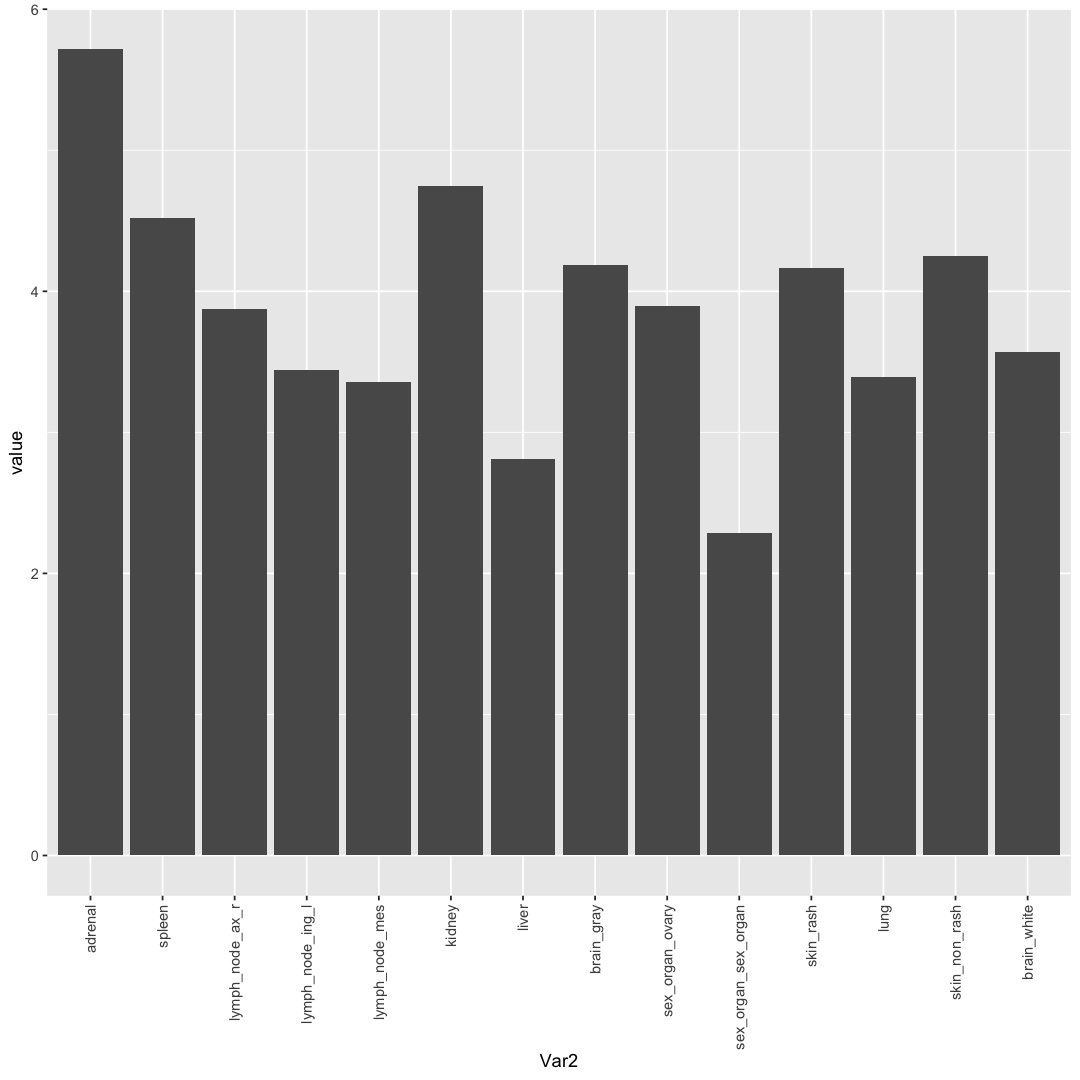

In [52]:
# NEURL3 (ENSMMUG00000000006.4)
reshape2::melt(flc.mat['ENSMMUG00000000006.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000022839.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('ESR2 (ENSMMUG00000022839.4)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000013283.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('CDHR2 (ENSMMUG00000013283.4)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000042375.2',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('INSL3 (ENSMMUG00000042375.2)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000040100.2',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('FOS (ENSMMUG00000040100.2)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000006727.3',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('VDR (ENSMMUG00000006727.3)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000056083.1',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('GPC1 (ENSMMUG00000056083.1)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000003468.3',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('GADD45B (ENSMMUG00000003468.3)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000038702.2',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('ZFP36 (EENSMMUG00000038702.2)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000023701.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('LRG1 (ENSMMUG00000023701.4)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000063131.1',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('MOB3C (ENSMMUG00000063131.1)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000021293.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('NRCAM (ENSMMUG00000021293.4)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000058428.1',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('SOCS3 (ENSMMUG00000058428.1)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000048424.2',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('SDC4 (ENSMMUG00000048424.2)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000048424.2',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('SDC4 (ENSMMUG00000048424.2)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000032106.3',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('MOB3C (ENSMMUG00000032106.3)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000060580.1',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('SAT1 (ENSMMUG00000060580.1)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000061478.1',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('SARM1 (ENSMMUG00000061478.1)')

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000058805.1',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('SPATA12 (ENSMMUG00000058805.1)')

In [ ]:
head(gene_map)

In [ ]:
gene_map[gene_map$external_gene_name == 'COL27A1',]

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000031973.3',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    theme_bw() + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('COL27A1 (ENSMMUG00000031973.3)') 

In [ ]:
gene_map[gene_map$external_gene_name == 'COL1A1',]

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000001467.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    theme_bw() + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('COL1A1 (ENSMMUG00000001467.4)') 

In [ ]:
gene_map[gene_map$external_gene_name == 'COL18A1',]

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000004472.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    theme_bw() + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('COL18A1 (ENSMMUG00000004472.4)') 

In [ ]:
gene_map[gene_map$external_gene_name == 'COL3A1',]

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000021286.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    theme_bw() + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('COL3A1 (ENSMMUG00000021286.4)') 

In [ ]:
gene_map[gene_map$external_gene_name == 'COL6A3',]

In [ ]:
reshape2::melt(flc.mat['ENSMMUG00000014049.4',,drop=FALSE]) %>% 
    ggplot(aes(x=Var2,y=value)) + 
    geom_bar(stat='identity') + 
    theme_bw() + 
    ggplot_rotate_labels + theme(axis.text=element_text(size=16)) +
    ggtitle('COL6A3 (ENSMMUG00000014049.4)') 